HTTP запросы с Python
======

**протокол HTTP** – это протокол передачи данных, которыми можно пользоваться в сети Интернет.

Сторона, которая принимает содержимое веб-страниц — браузер (еще его называют клиентом),    
а сторона, которая отдает содержимое веб-страниц — сервер.

Что происходит в результате ввода поискового запроса:



 1. Поиск DNS
 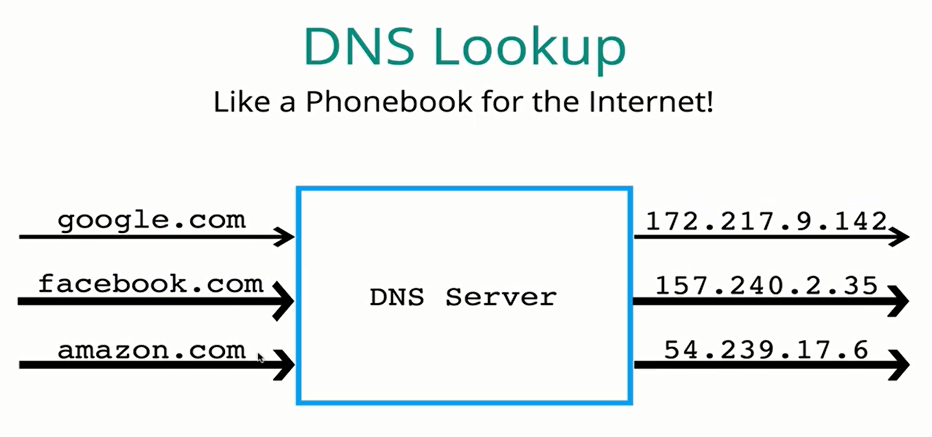
 2. Делается запрос на сервер
 3. Сревер обрабатывает запрос
 4. Сервер отправляет ответ
 
 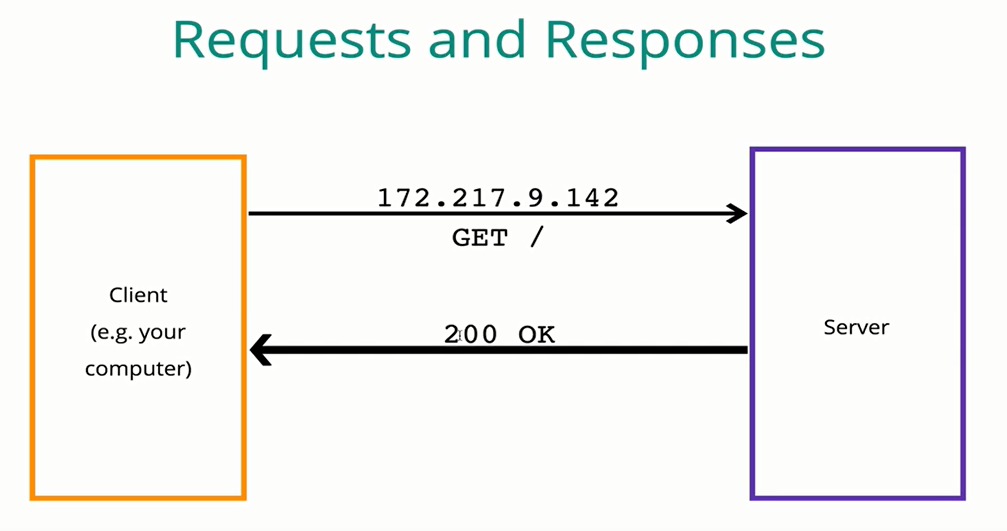
 
 
  Последние три пункта - Request/response cycle.
  
 Можно посмотреть, что происходит во время запроса:  chrome -> inspect-> network

Структура протокола
-----

1. **Starting line** — определяет тип сообщения
2. **Headers** — характеризуют тело сообщения, параметры передачи и прочие сведения;
3. **Message Body** — непосредственно данные сообщения. Обязательно должно отделяться от заголовков пустой строкой.

Тело сообщения может отсутствовать, но стартовая строка и заголовок являются обязательными элементами

 Подробно о структуре:   
   http://www.4stud.info/web-programming/protocol-http.html    
   https://ru.wikipedia.org/wiki/HTTP ))
   https://developer.mozilla.org/ru/docs/Web/HTTP/Overview
   
   
 1.  **Стартовая строка запроса** для HTTP 1.1 составляется по следующей схеме:

  Метод URI HTTP/Версия

 Например (такая стартовая строка может указывать на то, что запрашивается главная страница сайта):

  GET / HTTP/1.1

**Метод**  — тип запроса, одно слово заглавными буквами. Метод HTTP запроса указывает серверу, как нужно обращаться к запрашиваемому ресурсу, который указан в URI. Метод HTTP запроса чувствителен к регистру и его имя следует указывать только в верхнем регистре.

Нам понадобятся два метода: GET и POST. 


В примере выше метод GET. Он используется  для получения информации с сервера по указанному URI. HTTP запросы, использующие метод GET должны получать только данные и не должны оказывать никакого влияния на эти данные.


  **Стартовая строка ответа** сервера имеет следующий формат: HTTP/Версия КодСостояния Пояснение, где:
  - Версия — пара разделённых точкой цифр, как в запросе;
  - Код состояния — три цифры. По коду состояния определяется дальнейшее содержимое сообщения и поведение клиента;
  - Пояснение  — текстовое короткое пояснение к коду ответа для пользователя. Никак не влияет на сообщение и является необязательным.
  
  Например: 
    
    HTTP/1.0 200 OK
    
  Код состояния:
    
   - 2хх - Success
   - 2xx - Redirect
   - 4xx - Client Error
   - 5xx - Server Error
   
    
2. **HTTP заголовки** сопровождают обмен данными по протоколу HTTP. Они могут содержать описание данных и информацию необходимую для взаимодействия между клиентом и сервером. Заголовки и их статусы перечислены в реестре IANA, который постоянно обновляется.
  [подробно тут](https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers)
 
  Все заголовки разделяются на четыре основных группы:

  - General Headers («Основные заголовки») — могут включаться в любое сообщение клиента и сервера;
  - Request Headers («Заголовки запроса») — используются только в запросах клиента;
  - Response Headers («Заголовки ответа») — только для ответов от сервера;
  - Entity Headers («Заголовки сущности») — сопровождают каждую сущность сообщения.
 
 
3. **тело сообщения**  — это сами данные, которые передаются в запросе.  Тело сообщения – это необязательный параметр и может отсутствовать.

Когда мы получаем ответный запрос от сервера, тело сообщения, чаще всего представляет собой содержимое веб-страницы. Но, при запросах к серверу, оно тоже может иногда присутствовать, например, когда мы передаем данные, которые заполнили в форме обратной связи на сервер.


Пример:

**Запрос**
 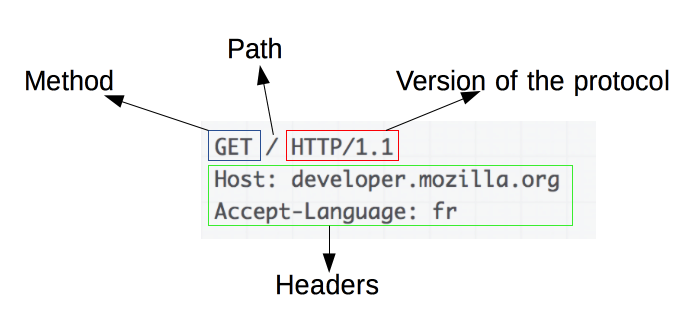
**Ответ**
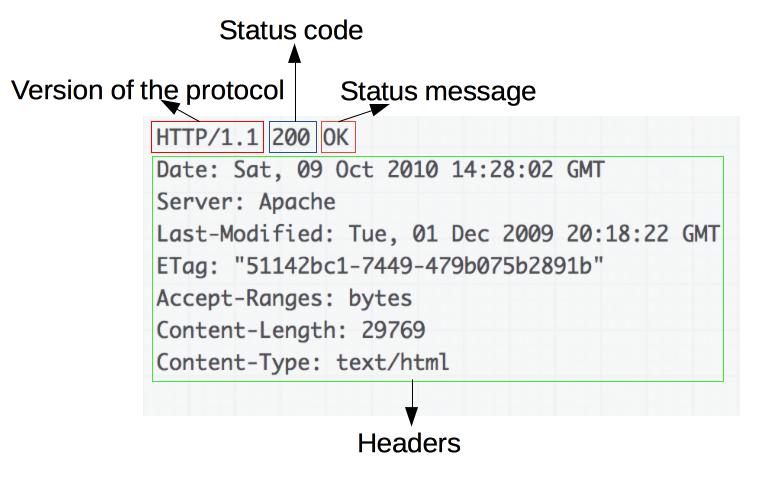


API и модуль requests
----

Мы будем отправлять запросы к **API**. Как уже упоминалось, **API** - интерфейс, который позволяет разработчикам использовать готовые блоки для построения приложения. В случае web-приложений - **API** может отдавать данные в отличном от стандартного **HTML** формате, благодаря чему им удобно пользоваться при написании собственных приложений. Сторонние общедоступные **API** чаще всего отдают данные в одном из двух форматов: **XML** или **JSON**.

**API в веб-приложениях на примерах**

То, как пользоваться **API** зависит от возможностей, которые предоставляет **API** и от того, насколько хорошо работает фантазия у разработчиков.
 
 - Возможно вы читаете https://www.reddit.com/ Вы можете получиить **API** версию сайта добавив к адресной строке /.json
 
 - **Github** – имеет свой  [API](https://developer.github.com/). Он позволяет, например, получать информацию о пользователе, его аватаре, читателях, репозиториях и другие сведения.
 - https://developer.twitter.com/en/docs У twitter есть API
 - https://developers.google.com/maps/documentation/maps-static/intro
 
 

Со стороны **Python** мы будет использовать модуль requests. 

Requests — библиотека **Python**, которая выполняет **HTTP**-запросы **(HTTP For Humans)**.
Чтоб узнать, установлен ли данный модуль, в **IDLE** введите **help("requests")**

Если не установлен, то устанавливаем.   
Из cmd команда: python -m  pip install requests   
Anaconda prompt:pip install requests   


 
Основной метод, который нам понадобится:   
requests.get(url, params=None, headers=None, cookies=None, auth=None, timeout=None)  

Sends a GET request. Returns Response object.   

Parameters:  

url – URL for the new  Request object.  
params – (optional) Dictionary of GET Parameters to send with the Request.  
headers – (optional) Dictionary of HTTP Headers to send with the Request.  
cookies – (optional) CookieJar object to send with the  Request.  
auth – (optional) AuthObject to enable Basic HTTP Auth.  
timeout – (optional) Float describing the timeout of the request.  

И... наконец-то код:

In [27]:
import requests
url = "https://habr.com/ru/"
res = requests.get(url)
res

<Response [200]>

In [28]:
res.headers

{'Server': 'QRATOR', 'Date': 'Wed, 22 May 2019 17:19:08 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Keep-Alive': 'timeout=15', 'Vary': 'Accept-Encoding', 'X-Powered-By': 'PHP/7.2.18-1+ubuntu16.04.1+deb.sury.org+1', 'X-Frame-Options': 'SAMEORIGIN', 'P3P': 'CP="CAO DSP COR CURa ADMa DEVa PSAa PSDa IVAi IVDi CONi OUR OTRi IND PHY ONL UNI FIN COM NAV INT DEM STA"', 'X-Content-Type-Options': 'nosniff', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains; preload', 'Public-Key-Pins': 'pin-sha256="jWWta3ma1DSx8lFr6uv04x6sSRmK5X4Z0ivIL7+qKLM="; pin-sha256="Efde6ZPsmxzZkludmzwnp0QJhZ1mSwHrhDxczbpZcmM="; pin-sha256="klO23nT2ehFDXCfx3eHTDRESMz3asj1muO+4aIdjiuY="; pin-sha256="kUh5F9diW5KlrhQ+nEKTIVFWVZuNbVqkKtm+KOGPXCE="; max-age=15552000', 'X-Proxy-Cache-Status': 'EXPIRED', 'X-Proxy-Upstream': 'habrcom-web'}

In [30]:
#для экономии места выведу только первые 200 символов
res. text[:200]  # но это тот html сайта в str формате

'<!DOCTYPE html>\n<html lang="ru" class="no-js">\n  <head>\n    <meta http-equiv="content-type" content="text/html; charset=utf-8" />\n<meta content=\'width=1024\' name=\'viewport\'>\n<title>Лучшие публикации з'

In [9]:
res.status_code

200

**requests** можно использовать для обработки исключений. 
Проблемы, которые могут возникнуть при работе с внешними сервисами:

- Хост недоступен. Обычно такого рода ошибка происходит из-за проблем конфигурирования **DNS**. (DNS lookup failure)
- "Вылет" соединения по таймауту
- Ошибки **HTTP**. Подробнее о **HTTP** кодах можно посмотреть здесь.
- Ошибки **SSL** соединений (обычно при наличии проблем с **SSL** сертификатом: просрочен, не является доверенным и т.д.)

Базовым классом-исключением в **requests** является **RequestException**. От него наследуются все остальные

- HTTPError
- ConnectionError
- Timeout
- SSLError
- ProxyError

**HTTPError**

In [31]:
import requests
try:
    response = requests.get('https://habr.com/ru/status/500')
    response.raise_for_status()
except requests.exceptions.HTTPError as err:
    print('Oops. HTTP Error occured')
    print(f'Response is: {err.response.content[:300]}')

Oops. HTTP Error occured
Response is: b'<!DOCTYPE html>\n<html >\n  <head>\n    <meta http-equiv="content-type" content="text/html; charset=utf-8" />\n    <meta content=\'width=device-width,initial-scale=1,user-scalable=no\' name=\'viewport\'>\n\n    <title>\xd0\xa5\xd0\xb0\xd0\xb1\xd1\x80</title>\n\n    \n    \n\n    \n\n    <link href="https://dr.habracdn.net/habrcom/styles/15'


**Timeout**

In [13]:
import requests
try:
     response = requests.get('https://httpbin.org/user-agent', timeout=(0.00001, 10))
except requests.exceptions.ConnectTimeout:
    print('Oops. Connection timeout occured!')

try:
    response = requests.get('https://httpbin.org/user-agent', timeout=(10, 0.0001))
except requests.exceptions.ReadTimeout:
     print('Oops. Read timeout occured')
except requests.exceptions.ConnectTimeout:
     print('Oops. Connection timeout occured!')

Oops. Connection timeout occured!
Oops. Read timeout occured


Теперь имея немного представление о requests отправим запрос к https://icanhazdadjoke.com/
Наша задача будет выводить рандомную шутку, которую будем получать с этого сайта. 
Изменим url и отправим запрос на сайт. Отправим запрос к этому сайту.
    

In [33]:
url = "https://icanhazdadjoke.com/"
res = requests.get(url)
res.text[:600]

'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1">\n<meta name="description" content="The largest collection of dad jokes on the internet" />\n<meta name="author" content="C653 Labs" />\n<meta name="keywords" content="dad,joke,funny,slack,alexa" />\n<meta property="og:site_name" content="icanhazdadjoke" />\n<meta property="og:title" content="icanhazdadjoke" />\n<meta property="og:type" content="website" />\n<meta property="og:url" content="https://ica'

Опять же, в выводе первые 600 символов для экономии места. Но где-то среди это информации дальше есть текст с шуткой)

Подправим наш запрос. метод get может принимать необязательный аргумент headers, которым отфильтруем нужную информацию. Подробнее в [документации ](https://2.python-requests.org//en/latest/api/)

In [18]:
res = requests.get(url, headers={"Accept": 'text/plain'}) #text/html выведет, что видим при обычном использовании get
print(res.text)
print(type(res.text))

What did the ocean say to the shore? Nothing, it just waved.
<class 'str'>


Почему все так просто, потому что этот сайт иммет API, который представляет возможно вот так получить информацию. Не все сайты это предоставляют. Можете попробовать обратиться так к гугл поиску.

Выше мы получили информацию в виде строки. однако, мы делаем запрос к API, и если он поддерживает JSON, то правильнее получить информацию в JSON. 
Далее, для того, чтоб с ней работать, ответ преобразуем с помощью метода .json() в словарь:

In [20]:
res = requests.get(url, headers={"Accept": 'application/json'})
print(res.text, type(res.text))
print(res.json(), type(res.json()))

<class 'requests.models.Response'>
{"id":"3w5wAIRZTnb","joke":"A police officer caught two kids playing with a firework and a car battery. He charged one and let the other one off.","status":200}
 <class 'str'>
{'id': '3w5wAIRZTnb', 'joke': 'A police officer caught two kids playing with a firework and a car battery. He charged one and let the other one off.', 'status': 200} <class 'dict'>


[Справочник полей HTTP заголовков](https://zametkinapolyah.ru/servera-i-protokoly/tema-10-spravochnik-polej-http-zagolovkov-spisok-polej-http-zagolovka-zagolovki-http-soobshhenij-zaprosov-i-otvetov.html)

In [21]:
data = res.json()
print(data['joke'])

A police officer caught two kids playing with a firework and a car battery. He charged one and let the other one off.


Строка запроса
----

Иногда, когда отправляем запрос к сайту, может понадобиться уточнить, какую информацию хочется получить от сервера. 
Например: получить шутки на тему "машины".

Уточнение к запросу указывается в следуещем формате:


In [36]:
#option 1

import requests

response = requests.get('http://www.example.com?key1=value1&key2=value2')

#option 2 - preferable!

response = requests.get(
    'http://www.example.com',
    params={
        'key1': 'value1',
        'key2': 'value2'
    }
)



Изменим пример c выводом шуток и добавим уточнение к запросу. Что понять как работать с API вам необходимо читать его документацию. В нашем случае, нас интересует какой ключ у поиска, чтоб добавить его в параметры.
Поэтому обращаемся к документации: https://icanhazdadjoke.com/api и находим раздел **"Search for dad jokes"**.

Обратите внимание на "optional query string parameters" - "term".     
можно убедиться что это то, что нам нужно, изменив строку поиска в браузере с:   
     https://icanhazdadjoke.com/api#search-for-dad-jokes  
 на:
     https://icanhazdadjoke.com/search?term=cat&limit=3   
     
применим:

In [37]:
url = 'https://icanhazdadjoke.com/search'

res = requests.get(
    url, 
    headers={"Accept": 'application/json'},
    params={'term': 'cat'}
)

data = res.json()

print(data)

{'current_page': 1, 'limit': 20, 'next_page': 1, 'previous_page': 1, 'results': [{'id': 'iGJeVKmWDlb', 'joke': 'My cat was just sick on the carpet, I don’t think it’s feline well.'}, {'id': '8UnrHe2T0g', 'joke': '‘Put the cat out’ … ‘I didn’t realize it was on fire'}, {'id': 'daaUfibh', 'joke': 'Why was the big cat disqualified from the race? Because it was a cheetah.'}, {'id': '0wcFBQfiGBd', 'joke': 'Did you hear the joke about the wandering nun? She was a roman catholic.'}, {'id': 'BQfaxsHBsrc', 'joke': 'What do you call a pile of cats?  A Meowtain.'}, {'id': 'AQn3wPKeqrc', 'joke': 'It was raining cats and dogs the other day. I almost stepped in a poodle.'}, {'id': 'O7haxA5Tfxc', 'joke': 'Where do cats write notes?\r\nScratch Paper!'}, {'id': '1wkqrcNCljb', 'joke': "Did you know that protons have mass? I didn't even know they were catholic."}, {'id': 'TS0gFlqr4ob', 'joke': 'What do you call a group of disorganized cats? A cat-tastrophe.'}, {'id': '39Etc2orc', 'joke': 'Why did the man

In [38]:
data['results'][5]['joke']

'It was raining cats and dogs the other day. I almost stepped in a poodle.'

Обратите внимание, что 'limit': 20. В примере выводится  6-я шутка - элемент из 'results'. можно изменить значение 'limit':

In [10]:
res = requests.get(
    url, 
    headers={"Accept": 'application/json'},
    params={'term': 'cat', 'limit': 1}
)

data = res.json()

data['results'][0]['joke']

'My cat was just sick on the carpet, I don’t think it’s feline well.'

**Задание:**
 
Напишите программу, которая запрашивает у пользователя на какую тему он хочет увидеть шутку. В результате запроса к сайту, сообщите сколько было найдено шуток по указанному тегу, и выведите первую или рандомную (если есть), иначе сообщите, что ничего не было найдено.

Пример результата:

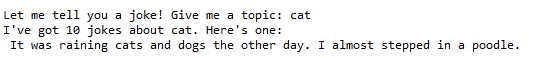
    